In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import seaborn as sns
import copy
from collections import Counter
from sklearn.metrics import confusion_matrix, classification_report


In [2]:
# Dataset Columns from the dataset
dataset_cols = ["Class_Label","Alcohol","Malic_Acid","Ash","Alcalinity_of_ash","Magnesium","Total_Phenols","Flavanoids",
                "Nonflavanoid_phenols","Proanthocyanins","Color_intensity","Hue","OD280/OD315_of_diluted_wines",
                "Proline"]

In [15]:
# Dataset Loading
df = pd.read_csv("C:/Users/alpya/OneDrive/Masaüstü/Yeni klasör/wine_dataset/wine.data", encoding='utf-8')
df.columns = dataset_cols #Assigning dataset columns to loaded data
#Checking Value Counts
for var in df.columns:
    print(df[var].value_counts())

Class_Label
2    71
1    58
3    48
Name: count, dtype: int64
Alcohol
13.05    6
12.37    6
12.08    5
12.29    4
12.25    3
        ..
13.72    1
13.29    1
13.74    1
13.77    1
14.13    1
Name: count, Length: 125, dtype: int64
Malic_Acid
1.73    7
1.67    4
1.81    4
1.90    3
1.68    3
       ..
1.09    1
1.19    1
1.17    1
1.01    1
4.10    1
Name: count, Length: 133, dtype: int64
Ash
2.28    7
2.30    7
2.70    6
2.32    6
2.36    6
       ..
2.80    1
3.22    1
2.52    1
2.22    1
2.37    1
Name: count, Length: 78, dtype: int64
Alcalinity_of_ash
20.0    15
16.0    11
21.0    11
18.0    10
19.0     9
        ..
12.4     1
17.1     1
16.4     1
16.3     1
27.0     1
Name: count, Length: 62, dtype: int64
Magnesium
88     13
86     11
98      9
101     9
96      8
102     7
112     6
85      6
94      6
92      5
80      5
97      5
103     5
89      5
108     4
106     4
107     4
90      4
100     3
111     3
104     3
78      3
84      3
87      3
110     3
120     3
116     3
1

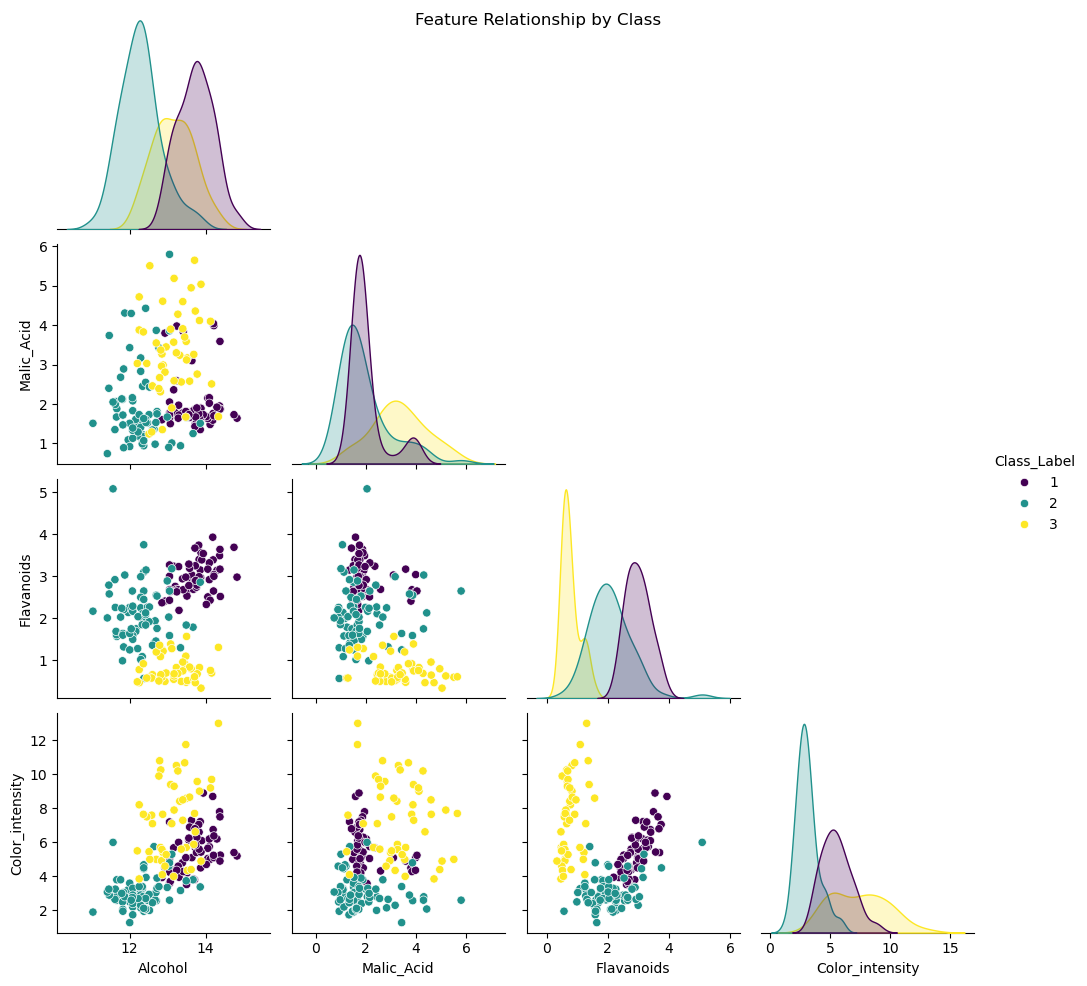

In [4]:
# Visualization with pairplot for selected values
sns.pairplot(df[['Alcohol', 'Malic_Acid', 'Flavanoids', 'Color_intensity', 'Class_Label']], 
             hue='Class_Label', palette='viridis', corner=True)
plt.suptitle('Feature Relationship by Class')
plt.show()

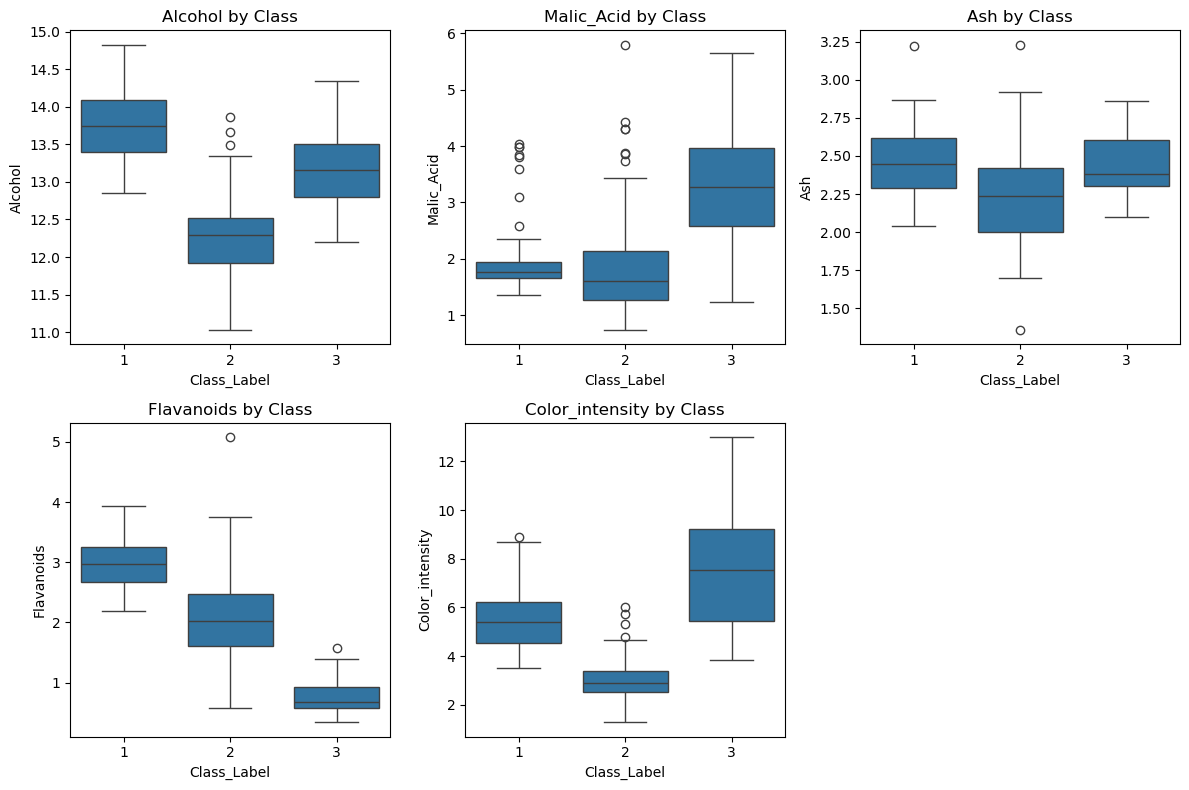

In [5]:
# Visualizing feature by class with boxplot
plt.figure(figsize=(12,8))
features_to_plot = ['Alcohol','Malic_Acid','Ash','Flavanoids','Color_intensity']
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2,3,i)
    sns.boxplot(x='Class_Label', y=feature, data=df)
    plt.title(f'{feature} by Class')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Total Phenols vs OD280/OD315')

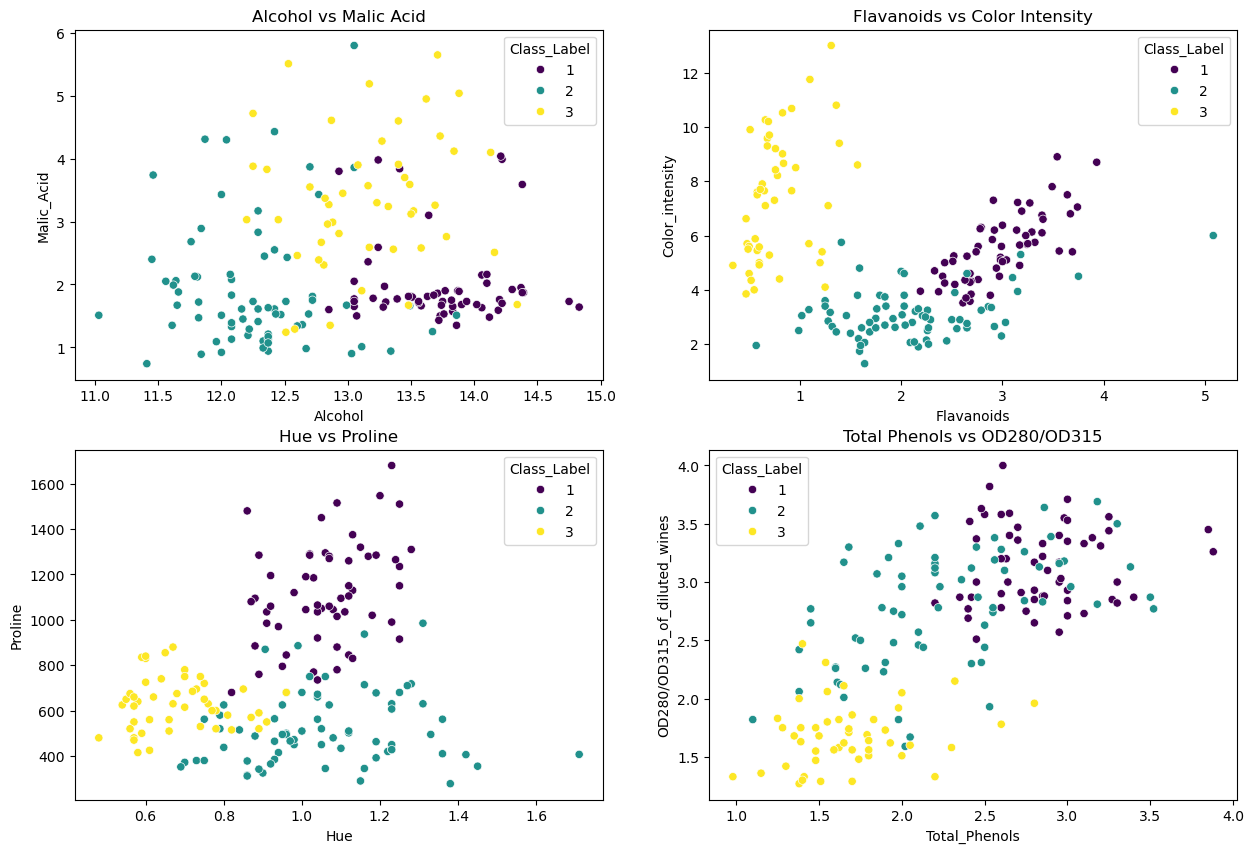

In [16]:
# Scatter plot to examine feature overlap
plt.figure(figsize=(15, 10))

# Plot 1 : Alcohol vs Malic Acid
plt.subplot(2, 2, 1)
sns.scatterplot(x='Alcohol', y='Malic_Acid',hue='Class_Label', data=df, palette='viridis')
plt.title('Alcohol vs Malic Acid')

# Plot 2 : Flavanoids vs Color Intensity
plt.subplot(2, 2, 2)
sns.scatterplot(x='Flavanoids', y='Color_intensity',hue='Class_Label', data=df, palette='viridis')
plt.title('Flavanoids vs Color Intensity')

# Plot 3 : Hue vs Proline
plt.subplot(2, 2, 3)
sns.scatterplot(x='Hue', y='Proline', hue='Class_Label', data=df, palette='viridis')
plt.title('Hue vs Proline')

# Plot 4 : Total Phenols vs OD280/OD315
plt.subplot(2, 2, 4)
sns.scatterplot(x='Total_Phenols', y='OD280/OD315_of_diluted_wines', hue='Class_Label', data=df, 
                palette='viridis')
plt.title('Total Phenols vs OD280/OD315')

In [7]:
# Data Processing and Splitting Data
# Defining X and y
X = df.drop('Class_Label', axis=1) 
y = df['Class_Label']

In [8]:
# Normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, 
                                                    stratify=y)
print(f'Training set shape: {X_train.shape}')
print(f'Test set shape: {X_test.shape}')

Training set shape: (141, 13)
Test set shape: (36, 13)


In [10]:
# KNN Classifier Implementation
class KNNClassifier:
    def __init__(self, k=3, distance_metric='euclidean'):
        self.k = k
        self.distance_metric = distance_metric
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y.values if hasattr(y, 'values') else y #Converting y_train to a NumPy array
        
    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)
    
    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))  
    
    def _manhattan_distance(self, x1, x2):
        return np.sum(np.abs(x1 - x2))
        
    def _predict(self, x):
        if self.distance_metric == 'euclidean':
            distances = [self._euclidean_distance(x, x_train) for x_train in self.X_train]
        elif self.distance_metric == 'manhattan':
            distances = [self._manhattan_distance(x, x_train) for x_train in self.X_train]
        else:
            raise ValueError("Invalid distance metric. Please choose 'euclidean' or 'manhattan'.")
    
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]
    
    def evaluate(self, X, y): 
        y_prediction = self.predict(X)
        accuracy = np.sum(y_prediction == y) / len(y)
        return accuracy

# Evaluate different k values and distance metrics
k_values = [1, 3, 5, 7, 9]
metrics = ['euclidean', 'manhattan']

results = {metric: [] for metric in metrics}

for metric in metrics:
    for k in k_values:
        knn = KNNClassifier(k=k, distance_metric=metric)
        knn.fit(X_train, y_train)
        accuracy = knn.evaluate(X_test, y_test)  
        results[metric].append(accuracy)
        print(f"Metric: {metric}, k: {k}, Accuracy: {accuracy:.4f}")

Metric: euclidean, k: 1, Accuracy: 0.9722
Metric: euclidean, k: 3, Accuracy: 0.9722
Metric: euclidean, k: 5, Accuracy: 0.9722
Metric: euclidean, k: 7, Accuracy: 1.0000
Metric: euclidean, k: 9, Accuracy: 1.0000
Metric: manhattan, k: 1, Accuracy: 0.9722
Metric: manhattan, k: 3, Accuracy: 0.9722
Metric: manhattan, k: 5, Accuracy: 1.0000
Metric: manhattan, k: 7, Accuracy: 1.0000
Metric: manhattan, k: 9, Accuracy: 1.0000


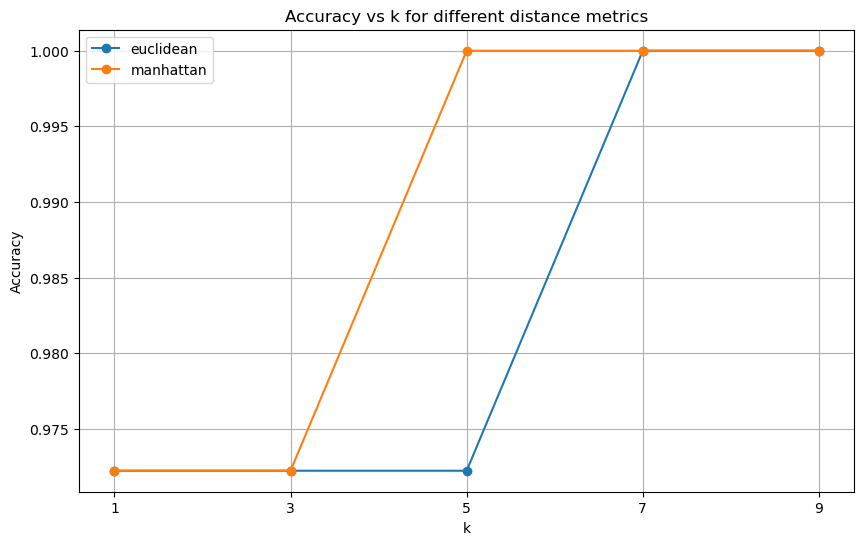

In [17]:
# Plot results for accuracy vs k for both euclidean and manhattan
plt.figure(figsize=(10, 6))
for metric in metrics:
    plt.plot(k_values, results[metric], marker='o', label=metric)
plt.title('Accuracy vs k for different distance metrics')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.legend()
plt.grid()    
plt.show()

In [21]:
# Evaluate best model
best_k = k_values[np.argmax(results['euclidean'])] # I choose euclidean for best result which returns best_k as 7.
knn = KNNClassifier(k=best_k, distance_metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

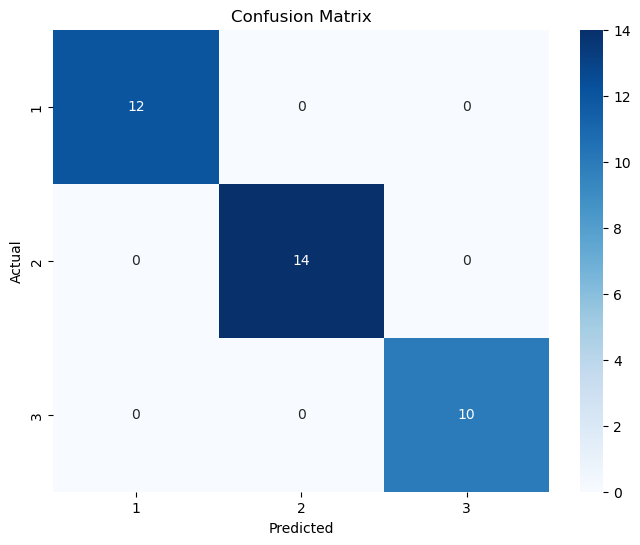

In [13]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred) # Because k=7 for euclidean has 100% accuracy, confusion matrix also 100%
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=df['Class_Label'].unique(),
            yticklabels=df['Class_Label'].unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [22]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred)) # Also for k=7 on euclidean


Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

